# TASK:
    KNN FROM SCRATCH

MACHINE LEARNING TASKS

INNOMATICS RESEARCH LABS

N.PRIYANKA


# Task  Problem Type: Regression
Predict the diamond price.💎
Write the KNN code from scratch and make it work on the given dataset ?



DATASET DESCRIPTION
1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 





# Step - 1: 
Load the data

In [1]:
# Importing necessary libraries
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as pplt 
import statsmodels.api as sm
from scipy.stats import mode
from random import randrange
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import operator
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,classification_report

from sklearn.model_selection import train_test_split

In [2]:
# Reading the data

data = pd.read_csv('diamonds.csv')

In [3]:
# Looking at the shape of the data

data.shape

(53940, 10)

In [4]:
# Looking at the head of the data

data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Looking at the tail of the data

data.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
# Descriptive statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940,NaN,NaN,NaN,61.7494,1.43262,43,61,61.8,62.5,79
table,53940,NaN,NaN,NaN,57.4572,2.23449,43,56,57,59,95
price,53940,NaN,NaN,NaN,3932.8,3989.44,326,950,2401,5324.25,18823
x,53940,NaN,NaN,NaN,5.73116,1.12176,0,4.71,5.7,6.54,10.74
y,53940,NaN,NaN,NaN,5.73453,1.14213,0,4.72,5.71,6.54,58.9
z,53940,NaN,NaN,NaN,3.53873,0.705699,0,2.91,3.53,4.04,31.8


In [7]:
# Looking at the unique values in the columns

data.nunique()


carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [8]:
# Looking at the missing values in the data

data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
data['depth']=data['depth'].replace(np.nan,0)

In [10]:
# Looking at the data types

data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

# Observations:

1.All the IDs present are unique.

2.There are no missing values in the dataset.

3.We can delete the Depth column as it is a derived column from length, width and height columns.

4.The Price column is the dependent column and all others are independent columns.

# Data PreProcessing

In [11]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [12]:
data = data.copy()
all_columns_data = data.copy()
data = data.drop(columns=['depth'])

In [13]:
data_invalid_rows = data[(data['carat']==0) | (data['table']==0) | (data['price']==0) |
                          (data['x']==0) | (data['y']==0) | (data['z']==0)]
data_invalid_rows

,carat,cut,color,clarity,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,61.0,12631,8.49,8.45,0.0


In [14]:
data_invalid_rows.shape

(20, 9)

In [15]:
data = data.drop(index=data_invalid_rows.index)
all_columns_data = all_columns_data.drop(index=data_invalid_rows.index)

In [16]:
# Resetting Index
data = data.reset_index(drop=True)
all_columns_dataset = data.reset_index(drop=True)

In [17]:
# calculating volume of 'x','y' and 'z' as those are length,width and depth

volume = data['x'] * data['y'] * data['z']

In [18]:
volume

0         38.202030
1         34.505856
2         38.076885
3         46.724580
4         51.917250
            ...    
53915    115.920000
53916    118.110175
53917    114.449728
53918    140.766120
53919    124.568444
Length: 53920, dtype: float64

In [19]:
# Now we can drop 'x','y' and 'z' columns

data = data.drop(columns=['x','y','z'])

In [20]:
# adding volume column

data = pd.concat([data, volume.rename("volume")], axis=1)
data

,carat,cut,color,clarity,table,price,volume
0,0.23,Ideal,E,SI2,55.0,326,38.202030
1,0.21,Premium,E,SI1,61.0,326,34.505856
2,0.23,Good,E,VS1,65.0,327,38.076885
3,0.29,Premium,I,VS2,58.0,334,46.724580
4,0.31,Good,J,SI2,58.0,335,51.917250
...,...,...,...,...,...,...,...
53915,0.72,Ideal,D,SI1,57.0,2757,115.920000
53916,0.72,Good,D,SI1,55.0,2757,118.110175
53917,0.70,Very Good,D,SI1,60.0,2757,114.449728
53918,0.86,Premium,H,SI2,58.0,2757,140.766120


In [21]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'price', 'volume'], dtype='object')

# Step - 2: 
Perform the EDA on the given dataset

Descriptive statistics

In [22]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53920,NaN,NaN,NaN,0.797698,0.473795,0.2,0.4,0.7,1.04,5.01
cut,53920,5,Ideal,21548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53920,7,G,11284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53920,8,SI1,13063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,53920,NaN,NaN,NaN,57.4568,2.23406,43,56,57,59,95
price,53920,NaN,NaN,NaN,3930.99,3987.28,326,949,2401,5323.25,18823
volume,53920,NaN,NaN,NaN,129.898,78.2198,31.708,65.1898,114.84,170.846,3840.6


In [23]:
# looking at the shape after eliminating some rows and adding a new column by eliminating three columns
data.shape

(53920, 7)

Univariate Analysis

Categorical Variables

In [24]:
data['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [25]:
data['clarity'].value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

In [26]:
data['color'].value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

Grade 'G' is most frequently occuring diamond color

'SI1' clarity is most frequently occuring clarity

'Ideal' cut is the most frequent cut from the given data

Univariate analysis for numerical variables

In [27]:
data.skew()

carat     1.116207
table     0.796799
price     1.618349
volume    3.042694
dtype: float64

Analysis 
    
All variables are right skewed.

table variable is moderately skewed.

Price,Carat are highly skewed.


In [28]:
def min_max_skew(series):
    cmin = np.around(np.min(series), 2)
    cmax = np.around(np.max(series), 2)
    skew = np.around(stats.skew(series), 2)
    
    return cmin, cmax, skew

In [29]:
def transform_skew(series):
    series_min, series_max, series_skew = min_max_skew(series)
    
    # Log transformation
    log_series = np.log(series)
    log_min, log_max, log_skew = min_max_skew(log_series)
    
    # Square root transformation
    root_series = np.sqrt(series)
    root_min, root_max, root_skew = min_max_skew(root_series)
    
    # Reciprocal transformation
    reciprocal_series = 1 / series
    reciprocal_min, reciprocal_max, reciprocal_skew = min_max_skew(reciprocal_series)
    
    # Box-Cox transformation
    boxcox_series = stats.boxcox(series)[0]
    boxcox_min, boxcox_max, boxcox_skew = min_max_skew(boxcox_series)
    
    # Building Min, Max and Transformed values DataFrame
    data_min_max_skew = pd.DataFrame({
        'Tranformation': ['Given Series', 'Log', 'Square root', 'Reciprocal', 'Box-Cox'],
        'Min': [series_min, log_min, root_min, reciprocal_min, boxcox_min],
        'Max': [series_max, log_max, root_max, reciprocal_max, boxcox_max],
        'Skew': [series_skew, log_skew, root_skew, reciprocal_skew, boxcox_skew]
    })
    
    return data_min_max_skew
    

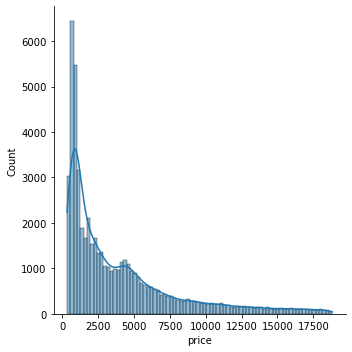

In [30]:
# Histogram of the data

sns.displot(data['price'], kde=True)
plt.show()

In [31]:
#Performing different transformations
transform_skew(data['price'])

,Tranformation,Min,Max,Skew
0,Given Series,326.00,18823.00,1.62
1,Log,5.79,9.84,0.12
2,Square root,18.06,137.20,0.84
3,Reciprocal,0.00,0.00,1.08
4,Box-Cox,4.80,7.20,0.03


After Observing min, max and skew values, the Box-Cox transformation seems to be the best fit.

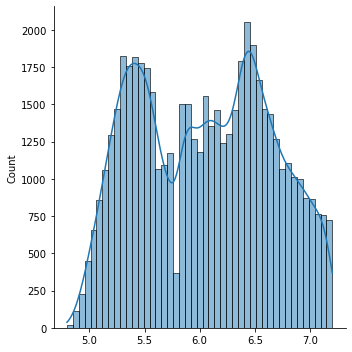

In [32]:
sns.displot(stats.boxcox(data['price'])[0], kde=True)
plt.show()

In [33]:
data['price_transformed'] = stats.boxcox(data['price'])[0]

In [34]:
# Deleting Price column
data = data.drop(columns=['price'])

table variable

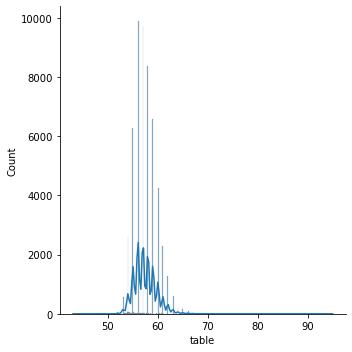

In [35]:
sns.displot(data['table'], kde=True)
plt.show()

In [36]:
transform_skew(data['table'])

,Tranformation,Min,Max,Skew
0,Given Series,43.00,95.00,0.80
1,Log,3.76,4.55,0.60
2,Square root,6.56,9.75,0.69
3,Reciprocal,0.01,0.02,-0.43
4,Box-Cox,0.24,0.24,-0.04


After Observing min, max and skew values, the Log transformation seems to be the best fit.

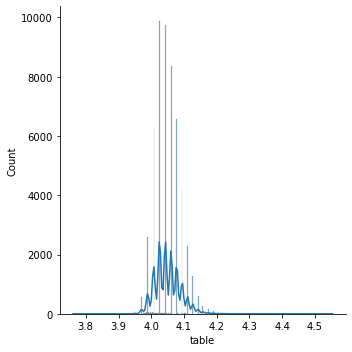

In [37]:
sns.displot(np.log(data['table']), kde=True)
plt.show()

In [38]:
data['table_transformed'] = np.log(data['table'])

In [39]:
data = data.drop(columns=['table'])

carat variable

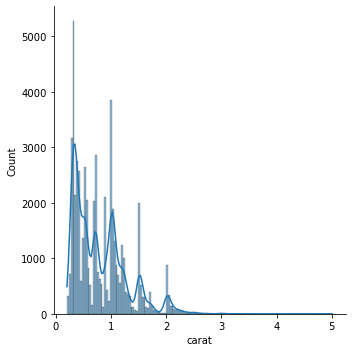

In [40]:
# Histogram before transformation
sns.displot(data['carat'], kde=True)
plt.show()

In [41]:
# Performing different transformations
transform_skew(data['carat'])

,Tranformation,Min,Max,Skew
0,Given Series,0.20,5.01,1.12
1,Log,-1.61,1.61,0.10
2,Square root,0.45,2.24,0.55
3,Reciprocal,0.20,5.00,0.60
4,Box-Cox,-1.74,1.49,0.02


After Observing min, max and skew values, the Square root transformation seems to be the best fit.

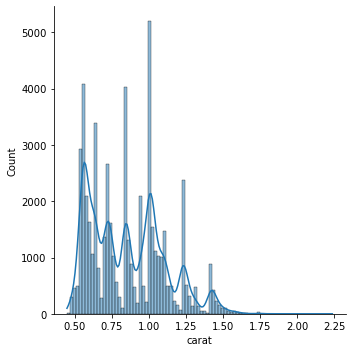

In [42]:
# Plotting the histogram after square root transformation
sns.displot(np.sqrt(data['carat']), kde=True)
plt.show()

In [43]:
data['carat_transformed'] = np.sqrt(data['carat'])

In [44]:
data = data.drop(columns=['carat'])

In [45]:
data.reset_index()

,index,cut,color,clarity,volume,price_transformed,table_transformed,carat_transformed
0,0,Ideal,E,SI2,38.202030,4.795646,4.007333,0.479583
1,1,Premium,E,SI1,34.505856,4.795646,4.110874,0.458258
2,2,Good,E,VS1,38.076885,4.797723,4.174387,0.479583
3,3,Premium,I,VS2,46.724580,4.812074,4.060443,0.538516
4,4,Good,J,SI2,51.917250,4.814098,4.060443,0.556776
...,...,...,...,...,...,...,...,...
53915,53915,Ideal,D,SI1,115.920000,6.144643,4.043051,0.848528
53916,53916,Good,D,SI1,118.110175,6.144643,4.007333,0.848528
53917,53917,Very Good,D,SI1,114.449728,6.144643,4.094345,0.836660
53918,53918,Premium,H,SI2,140.766120,6.144643,4.060443,0.927362


In [46]:
# checking the skewness of variables
data.skew()

volume               3.042694
price_transformed    0.025624
table_transformed    0.599299
carat_transformed    0.548362
dtype: float64

In [47]:
data.head()

,cut,color,clarity,volume,price_transformed,table_transformed,carat_transformed
0,Ideal,E,SI2,38.202030,4.795646,4.007333,0.479583
1,Premium,E,SI1,34.505856,4.795646,4.110874,0.458258
2,Good,E,VS1,38.076885,4.797723,4.174387,0.479583
3,Premium,I,VS2,46.724580,4.812074,4.060443,0.538516
4,Good,J,SI2,51.917250,4.814098,4.060443,0.556776


In [48]:
# Rearranging columns
data = data[['price_transformed', 'cut', 'color', 'clarity', 'carat_transformed',
                'table_transformed','volume']]

In [49]:
data.head()

,price_transformed,cut,color,clarity,carat_transformed,table_transformed,volume
0,4.795646,Ideal,E,SI2,0.479583,4.007333,38.202030
1,4.795646,Premium,E,SI1,0.458258,4.110874,34.505856
2,4.797723,Good,E,VS1,0.479583,4.174387,38.076885
3,4.812074,Premium,I,VS2,0.538516,4.060443,46.724580
4,4.814098,Good,J,SI2,0.556776,4.060443,51.917250


# Bivariate analysis

In [50]:
# checking the correlation
data.corr()

,price_transformed,carat_transformed,table_transformed,volume
price_transformed,1.000000,0.950912,0.160609,0.894328
carat_transformed,0.950912,1.000000,0.190884,0.966848
table_transformed,0.160609,0.190884,1.000000,0.169229
volume,0.894328,0.966848,0.169229,1.000000


Table column can be dropped as it doesnt show any impact with dependent variable price

In [51]:
data.drop('table_transformed',axis=1,inplace=True)

In [52]:
data.head()

,price_transformed,cut,color,clarity,carat_transformed,volume
0,4.795646,Ideal,E,SI2,0.479583,38.202030
1,4.795646,Premium,E,SI1,0.458258,34.505856
2,4.797723,Good,E,VS1,0.479583,38.076885
3,4.812074,Premium,I,VS2,0.538516,46.724580
4,4.814098,Good,J,SI2,0.556776,51.917250


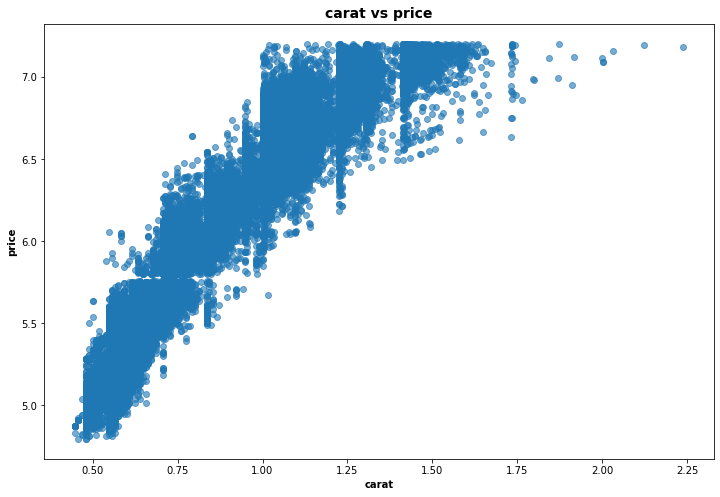

In [53]:
# Scatter plot between number of carats and price of diamonds
plt.figure(figsize=(12,8))
plt.scatter(data['carat_transformed'],
            data['price_transformed'],
            alpha=0.6)
plt.title('carat vs price', fontsize=14, weight='bold')
plt.xlabel('carat', weight='bold')
plt.ylabel('price', weight='bold')
plt.show()

We can observe that there are some outliers in the scatter plot when the Carat value is high. 
One way to resolve this issue is by trimming the Carat variable values above 99th percentile.

In [54]:
result1 = data['carat_transformed'].quantile(0.99)
result2 = all_columns_data['carat'].quantile(0.99)

In [55]:
data = data[data['carat_transformed'] < result1]
all_columns_data = all_columns_data[all_columns_data['carat'] < result2]

In [56]:
# Resetting index
data = data.reset_index(drop=True)
all_columns_data = all_columns_data.reset_index(drop=True)

In [57]:
skew = stats.skew(data['carat_transformed'])
np.around(skew, 2)

0.46

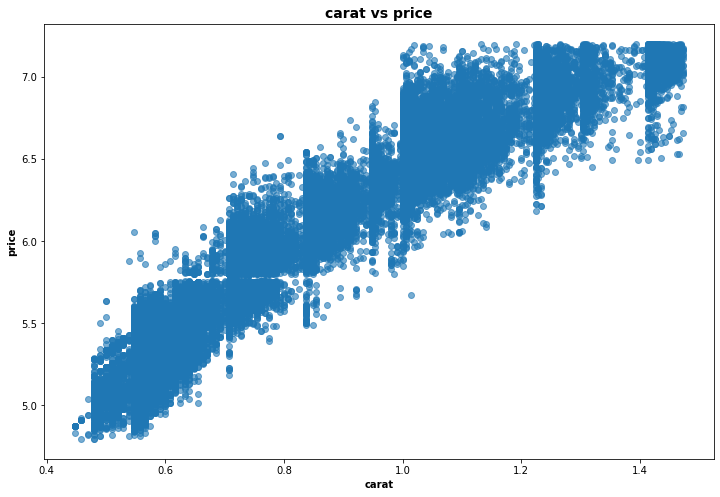

In [58]:
# Now lets look at the scatter plot after removing outliers
plt.figure(figsize=(12,8))
plt.scatter(data['carat_transformed'],
            data['price_transformed'],
            alpha=0.6)
plt.title('carat vs price', fontsize=14, weight='bold')
plt.xlabel('carat', weight='bold')
plt.ylabel('price', weight='bold')
plt.show()

In [59]:
data.columns

Index(['price_transformed', 'cut', 'color', 'clarity', 'carat_transformed',
       'volume'],
      dtype='object')

In [60]:
def barplot(column,data):
    bar_plot1 = sns.countplot(x=column, data=data)
    
    total = len(data[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 30, percentage, ha="center")

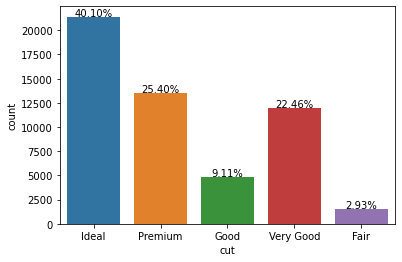

In [61]:
barplot("cut",data)

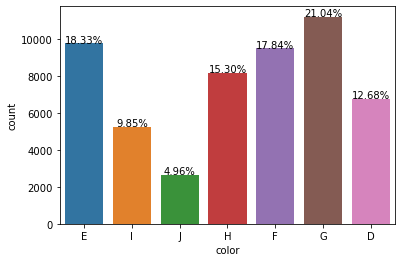

In [62]:
barplot('color',data)

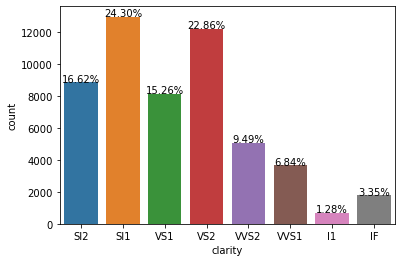

In [63]:
barplot('clarity',data)

# Step - 3:
    Handle Categorical Columns 
    i.e. convert them to numerical representation (TODO - Wisely choose between LabelEncoding and OneHotEncoding)

In [64]:
data.dtypes

price_transformed    float64
cut                   object
color                 object
clarity               object
carat_transformed    float64
volume               float64
dtype: object

In [65]:
# converting to appropriate datatypes

num_attr=['price_transformed','carat_transformed','volume']
data[num_attr] = data[num_attr].astype('int')

In [66]:
cat_attr=['cut','color','clarity']
data[cat_attr]=data[cat_attr].astype('category')

In [67]:
data.dtypes

price_transformed       int32
cut                  category
color                category
clarity              category
carat_transformed       int32
volume                  int32
dtype: object

<AxesSubplot:>

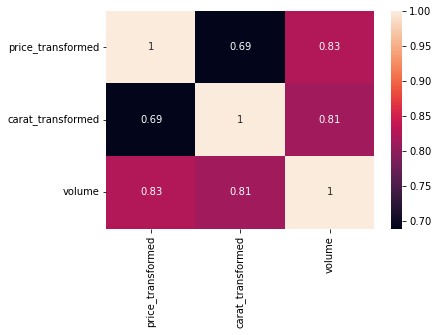

In [68]:
sns.heatmap(data.corr(),annot=True)

# Step - 4: 
    Normalise the data

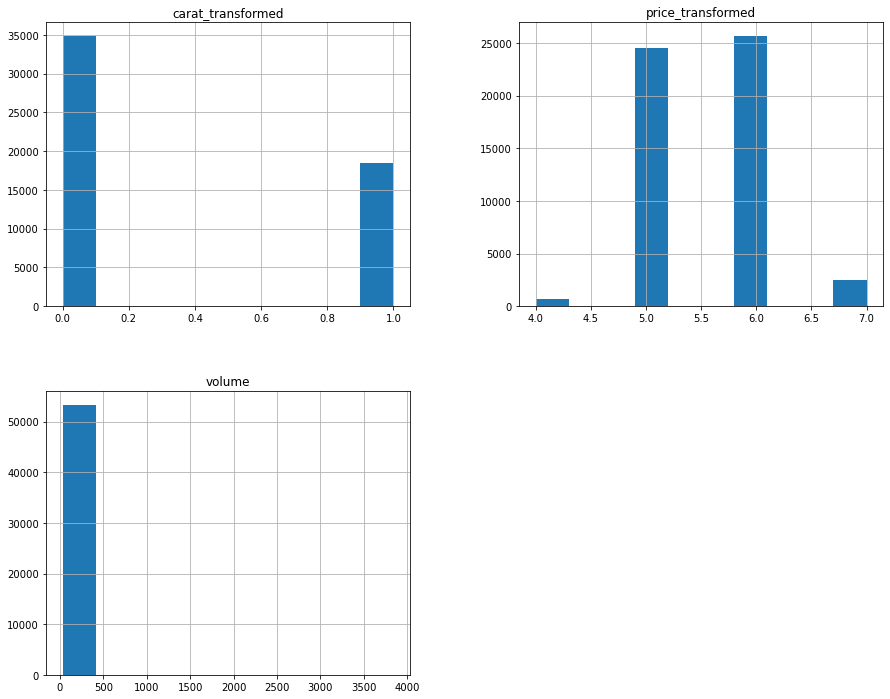

In [69]:
data.hist(figsize=(15,12));

# Step - 5: 
    Split the data - Test and Train (recommended 75:25 split)

In [70]:
X = data.drop('price_transformed', axis=1)
y = data['price_transformed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123) 

In [71]:
X_train.shape

(37364, 5)

In [72]:
X_test.shape

(16014, 5)

# Converting categorical attributes to numeric attributes

In [73]:
cat_attr = X_train.select_dtypes(include=['category']).columns
cat_attr

Index(['cut', 'color', 'clarity'], dtype='object')

In [74]:
enc = OneHotEncoder(drop = 'first')

enc.fit(X_train[cat_attr])

OneHotEncoder(drop='first')

In [75]:
col_names = enc.get_feature_names()

In [76]:
col_names

array(['x0_Good', 'x0_Ideal', 'x0_Premium', 'x0_Very Good', 'x1_E',
       'x1_F', 'x1_G', 'x1_H', 'x1_I', 'x1_J', 'x2_IF', 'x2_SI1',
       'x2_SI2', 'x2_VS1', 'x2_VS2', 'x2_VVS1', 'x2_VVS2'], dtype=object)

In [77]:
X_train_ohe=enc.transform(X_train[cat_attr]).toarray()
X_test_ohe=enc.transform(X_test[cat_attr]).toarray()

In [78]:
X_train_ohe[0:10]

array([[0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0.]])

# Standardizing numeric Attributes

In [79]:
num_attr = X_train.select_dtypes(include=['int32']).columns
num_attr

Index(['carat_transformed', 'volume'], dtype='object')

In [80]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler()

In [81]:
X_train_std = scaler.transform(X_train[num_attr])
X_test_std = scaler.transform(X_test[num_attr])

In [82]:
print(X_train_std.shape)
print(X_test_std.shape)

(37364, 2)
(16014, 2)


In [83]:
X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_std, X_test_ohe], axis=1)

In [84]:
X_train_con.shape

(37364, 19)

# Implementing KNN from scratch
Creating a functioning KNN classifier can be broken down into several steps. 

While KNN includes a bit more nuance than this, here’s my bare-bones to-do list:

Define a function to calculate the distance between two points

Use the distance function to get the distance between a test point and all known data points

Sort distance measurements to find the points closest to the test point (i.e., find the nearest neighbors)

Use majority class labels of those closest points to predict the label of the test point

Repeat steps 1 through 4 until all test data points are classified

In [87]:
from sklearn.neighbors import KNeighborsRegressor

In [88]:
model= KNeighborsRegressor( )
model.fit(X_train_con, y_train)

KNeighborsRegressor()

In [89]:
train_pred = model.predict(X_train_con)
test_pred = model.predict(X_test_con)

In [90]:
print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))


The Mean Absolute Error on train dataset: 0.0461032009420833 

The Mean Absolute Error on test dataset: 0.057961783439490454 

The Mean Squared Error on train dataset: 0.02301573707311851 

The Mean Squared Error on test dataset: 0.03452229299363058 

The Root Mean Squared Error on train dataset: 0.15170938360272415 

The Root Mean Squared Error on test dataset: 0.18580175724042702 

The Mean Absolute Percentage Error on train dataset: 0.8415867578162838 

The Mean Absolute Percentage Error on test dataset: 1.0551957513366284 



In [91]:
correlation_matrix = X_train.corr()
correlation_matrix

,carat_transformed,volume
carat_transformed,1.000000,0.805735
volume,0.805735,1.000000
